In [95]:
import math
import numpy as np
import pandas as pd
from tqdm import tqdm

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute

import math
pi=math.pi

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size':12})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [31]:
def X(qc,q,theta):
    """
    exp(-i*theta*X)
    """
    qc.rx(2*theta,q)
    
    
def Y(qc,q,theta):
    """
    exp(-i*theta*Y)
    """
    qc.ry(2*theta,q)
        
    
def Z(qc,q,theta):
    """
    exp(-i*theta*Z)
    """
    qc.rz(2*theta,q)
    
    
def XX(qc,q0,q1,theta):
    """
    exp(-i*theta*X0*X1)
    """
    qc.cx(q0,q1)
    qc.rx(2*theta,q0)
    qc.cx(q0,q1)
    
    
def YY(qc,q0,q1,theta):
    """
    exp(-i*theta*Y0*Y1)
    """
    qc.sdg(q0); qc.sdg(q1)
    qc.cx(q0,q1)
    qc.rx(2*theta,q0)
    qc.cx(q0,q1)
    qc.s(q0); qc.s(q1)
    

def ZZ(qc,q0,q1,theta):
    """
    exp(-i*theta*Z0*Z1)
    """
    qc.cx(q1,q0)
    qc.rz(2*theta,q0)
    qc.cx(q1,q0)
    
    
def XZ(qc,q0,q1,theta):
    """
    exp(-i*theta*X0*Z1)
    """
    qc.h(q0)
    qc.cx(q1,q0)
    qc.rz(2*theta,q0)
    qc.cx(q1,q0)
    qc.h(q0)
    

def ZZZ(qc,q0,q1,q2,theta):
    """
    exp(-i*theta*Z0*Z1*Z2)
    """
    qc.cx(q1,q0)
    qc.cx(q2,q0)
    qc.rz(2*theta,q0)
    qc.cx(q2,q0)
    qc.cx(q1,q0)
    

def XXX(qc,q0,q1,q2,theta):
    """
    exp(-i*theta*X0*X1*X2)
    """
    qc.cx(q0,q1)
    qc.cx(q0,q2)
    qc.rx(2*theta,q0)
    qc.cx(q0,q2)
    qc.cx(q0,q1)
    

def XYY(qc,q0,q1,q2,theta):
    """
    exp(-i*theta*X0*Y1*Y2)
    """
    qc.sdg(q1); qc.sdg(q2)
    qc.cx(q0,q1)
    qc.cx(q0,q2)
    qc.rx(2*theta,q0)
    qc.cx(q0,q2)
    qc.cx(q0,q1)
    qc.s(q1); qc.s(q2)
    
    
def XZZ(qc,q0,q1,q2,theta):
    """
    exp(-i*theta*X0*Z1*Z2)
    """
    qc.h(q0)
    qc.cx(q1,q0)
    qc.cx(q2,q0)
    qc.rz(2*theta,q0)
    qc.cx(q2,q0)
    qc.cx(q1,q0)
    qc.h(q0)
    
    
def XXZ(qc,q0,q1,q2,theta):
    """
    exp(-i*theta*X0*X1*Z2)
    """
    qc.h(q0); qc.h(q1)
    qc.cx(q1,q0)
    qc.cx(q2,q0)
    qc.rz(2*theta,q0)
    qc.cx(q2,q0)
    qc.cx(q1,q0)
    qc.h(q0); qc.h(q1)
    
    
def YYZ(qc,q0,q1,q2,theta):
    """
    exp(-i*theta*Y0*Y1*Z2)
    """
    qc.sdg(q0); qc.sdg(q1)
    qc.h(q0); qc.h(q1)
    qc.cx(q1,q0)
    qc.cx(q2,q0)
    qc.rz(2*theta,q0)
    qc.cx(q2,q0)
    qc.cx(q1,q0)
    qc.h(q0); qc.h(q1)
    qc.s(q0); qc.s(q1)
    
    
def XZZZ(qc,q0,q1,q2,q3,theta):
    """
    exp(-i*theta*X0*Z1*Z2*Z3)
    """
    qc.h(q0)
    qc.cx(q1,q0)
    qc.cx(q2,q0)
    qc.cx(q3,q0)
    qc.rz(2*theta,q0)
    qc.cx(q3,q0)
    qc.cx(q2,q0)
    qc.cx(q1,q0)
    qc.h(q0)
    
    
def XXZZ(qc,q0,q1,q2,q3,theta):
    """
    exp(-i*theta*X0*X1*Z2*Z3)
    """
    qc.h(q0); qc.h(q1)
    qc.cx(q1,q0)
    qc.cx(q2,q0)
    qc.cx(q3,q0)
    qc.rz(2*theta,q0)
    qc.cx(q3,q0)
    qc.cx(q2,q0)
    qc.cx(q1,q0)
    qc.h(q0); qc.h(q1)
    
    
def YYZZ(qc,q0,q1,q2,q3,theta):
    """
    exp(-i*theta*Y0*Y1*Z2*Z3)
    """
    qc.sdg(q0); qc.sdg(q1)
    qc.h(q0); qc.h(q1)
    qc.cx(q1,q0)
    qc.cx(q2,q0)
    qc.cx(q3,q0)
    qc.rz(2*theta,q0)
    qc.cx(q3,q0)
    qc.cx(q2,q0)
    qc.cx(q1,q0)
    qc.h(q0); qc.h(q1)
    qc.s(q0); qc.s(q1)

In [42]:
def H(qc,q,dt):
    """
    exp(-i*dt*H)
    """
    N = len(q)    
    theta = (1/4)*dt
    
    for i in range(1,N-1):
        X(qc,q[i],theta)
        XZZ(qc,q[i],q[i-1],q[i+1],theta)
        XZ(qc,q[i],q[i+1],theta)
        XZ(qc,q[i],q[i-1],theta)


In [91]:
def Neel(qc,q):
    N = len(q)    
    
    for i in range(1,N,2):
        qc.rx(pi,q[i])

In [44]:
def evolution(qc,q,dt):
    """
    exp(-i*dt*(H_E - K*H_M))
    """
    H(qc,q,dt)

## Measure Fidelity

In [80]:
N=8
T=5
dt=0.05
M=int(T/dt)
times = np.arange(M)

backend = Aer.get_backend("qasm_simulator")
shots = 1024 # irrelevant for snapshot

fidelity = []
for time in times:

    q = QuantumRegister(N,"q")
    c = ClassicalRegister(N,"c")
    qc = QuantumCircuit(q,c)
    
    for _ in range(time):
        evolution(qc,q,dt)
    
    qc.measure(q,c)
    
    job = execute(qc,backend=backend,shots=shots)
    result = job.result()
    counts = result.get_counts()
    #snapshot = result.data()["snapshots"]["statevector"]["1"][0]
    
    
    r1=list(counts.keys())
    
    if np.any(np.array(r1)=="0"*N):
        fidelity.append(counts["0"*N]/shots)
    else:
        fidelity.append(0)

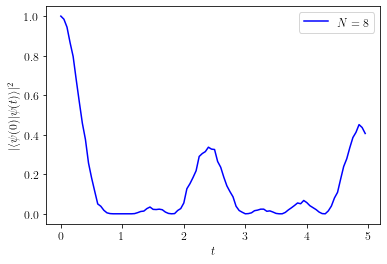

In [81]:
times = np.arange(int(T/dt))
plt.plot(dt*times,fidelity,'b-',label=r"$N=8$")
plt.xlabel("$t$")
plt.ylabel(r"$|\langle \psi(0)|\psi(t)\rangle|^2$")
plt.legend()
plt.show()

In [97]:
N=8
T=5
dt=0.05
M=int(T/dt)
times = np.arange(M)

backend = Aer.get_backend("qasm_simulator")
shots = 1024 # irrelevant for snapshot

fidelity2 = []
for time in times:

    q = QuantumRegister(N,"q")
    c = ClassicalRegister(N,"c")
    qc = QuantumCircuit(q,c)
    
    Neel(qc,q)
    
    for _ in range(time):
        evolution(qc,q,dt)
    
    qc.measure(q,c)
    
    job = execute(qc,backend=backend,shots=shots)
    result = job.result()
    counts = result.get_counts()
    #snapshot = result.data()["snapshots"]["statevector"]["1"][0]
    
    r1=np.array(list(counts.keys()))
    
    if np.any(r1=="10"*(N//2)):
        fidelity2.append(counts["10"*(N//2)]/shots)
    else:
        fidelity2.append(0)

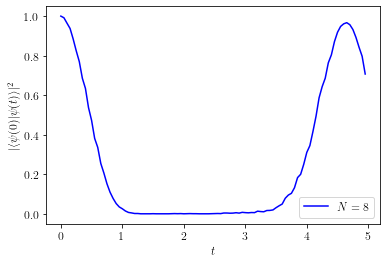

In [98]:
times = np.arange(int(T/dt))
plt.plot(dt*times,fidelity2,'b-',label=r"$N=8$")
plt.xlabel("$t$")
plt.ylabel(r"$|\langle \psi(0)|\psi(t)\rangle|^2$")
plt.legend()
plt.show()

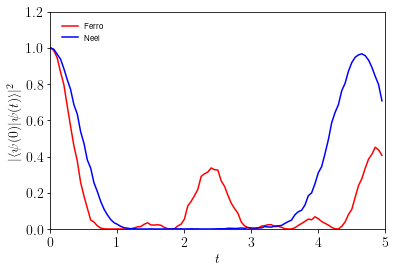

In [99]:
times = np.arange(int(T/dt))
plt.plot(dt*times,fidelity,'r-',label="Ferro")
plt.plot(dt*times,fidelity2,'b-',label="Neel")

plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"$|\langle\psi(0)|\psi(t)\rangle|^2$", fontsize=14)
plt.tick_params(labelsize=14)
plt.xlim([0.,T])
plt.ylim([0.,1.20])
legend =plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left', borderaxespad=1, fontsize=8)
frame = legend.get_frame()
frame.set_linewidth(0)
plt.show()